# Women and Child Health: Analysis of NFHS-4 Data
National Family Health Survey, 4 (2015-2016) - India

- Data for this project has been taken from https://data.gov.in/
- Link to the dataset: https://data.gov.in/catalog/key-indicators-national-family-health-survey-nfhs
<br> </br>

The data is split across 30 files - one for each state of India. Each file contains district wise data for 93 attributes. 

## Data Preprocessing

 ### 1. Merging the data from the 30 files into one single file, so as to facilitate analysis on an all India level.

In [2]:
# importing pandas and numpy libraries for data handling
import pandas as pd
import numpy as np

In [3]:
import os

In [5]:
# take code from colab notebook

In [7]:
dataset=pd.read_csv('./Data/data.csv')

In [10]:
dataset

,Unnamed: 0,Households surveyed,Women age 15-49 years interviewed,Men age 15-49 years interviewed,1. Population (female) age 6+ years who ever attended school (%),2. Population below age 15 years (%),3. Sex ratio of the total population (females per 1000 males),4. Sex ratio at birth for children born in the last five years (females per 1000 males),5. Children under age 5 years whose birth was registered (%),6. Households with electricity (%),...,85. Slightly above normal (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),86. Moderately high (Systolic 160-179 mm of Hg and/or Diastolic 100-109 mm of Hg) (%),87. Very high (Systolic ?180 mm of Hg and/or Diastolic ?110 mm of Hg) (%),88. Slightly above normal (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),89. Moderately high (Systolic 160-179 mm of Hg and/or Diastolic 100-109 mm of Hg) (%),90. Very high (Systolic ?180 mm of Hg and/or Diastolic ?110 mm of Hg) (%),91. Cervix (%),92. Breast (%),93. Oral cavity (%),State
0,Srikakulam - Rural,660.0,673.0,85.0,54.3,22.2,1026.0,865.0,89.2,96.8,...,4.1,0.8,1.0,10.3,0.0,2.7,37.2,5.9,9.3,AP
1,Srikakulam - Total,784.0,815.0,104.0,58.4,22.2,1028.0,933.0,89.3,97.3,...,4.9,1.1,0.9,11.0,0.9,2.2,37.4,6.9,9.1,AP
2,Vizianagaram - Rural,635.0,689.0,75.0,51.6,23.8,1069.0,917.0,86.2,97.5,...,5.5,1.8,0.5,15.9,3.5,0.0,31.6,3.7,10.7,AP
3,Vizianagaram - Total,799.0,850.0,98.0,56.4,23.7,1066.0,864.0,88.0,98.1,...,6.4,1.7,0.4,15.9,2.7,0.0,38.0,3.8,13.7,AP
4,Visakhapatnam - Urban,373.0,396.0,57.0,74.7,21.0,1041.0,1231.0,93.0,99.4,...,8.1,2.2,1.3,8.8,2.3,1.1,15.6,3.1,11.5,AP
5,Visakhapatnam - Rural,395.0,376.0,50.0,48.6,25.5,1053.0,1013.0,78.5,97.7,...,6.0,1.1,1.6,9.2,2.5,2.6,17.7,2.0,6.9,AP
6,Visakhapatnam - Total,768.0,772.0,107.0,61.3,23.3,1047.0,1097.0,84.5,98.5,...,7.1,1.7,1.4,9.0,2.4,1.7,16.6,2.6,9.3,AP
7,East Godavari - Rural,595.0,608.0,90.0,64.1,22.6,921.0,968.0,83.7,98.8,...,9.0,2.7,0.6,12.7,10.2,1.1,36.4,5.5,14.3,AP
8,East Godavari - Total,803.0,802.0,125.0,69.0,21.8,927.0,1008.0,84.3,99.1,...,9.0,2.7,0.6,11.4,8.0,2.9,40.1,5.0,19.7,AP
9,West Godavari - Rural,627.0,593.0,76.0,68.7,23.8,1019.0,755.0,88.1,98.6,...,7.5,2.2,0.9,15.9,2.8,0.0,35.9,6.1,15.6,AP


In [50]:
dataset.columns

Index(['Unnamed: 0', 'Households surveyed',
       'Women age 15-49 years interviewed', 'Men age 15-49 years interviewed',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '2. Population below age 15 years (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '5. Children under age 5 years whose birth was registered (%)',
       '6. Households with electricity (%)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '11. Households with any usual member covered by a health scheme or health insurance (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
 

In [56]:
# renaming the first column to District
dataset.columns[0]

'Unnamed: 0'

In [57]:
dataset=dataset.rename(columns={dataset.columns[0] : 'District' })

In [58]:
dataset.columns[0]

'District'


### 2. Creation of new attribute: Region( Rural/ Urban/Total) 

In [87]:
region=[]
district=[]

n=dataset.shape[0]
for i in range(n):
    
    name=dataset.iloc[i]['District']
    
    if(name.find('Rural')!=-1):
        name=name.replace('- Rural', '')
        name=name.strip()
        district.append(name)
        region.append('Rural')
        
    elif(name.find('Urban')!=-1):
        name=name.replace('- Urban', '')
        name=name.strip()
        district.append(name)
        region.append('Urban')
        
    elif(name.find('Total')!=-1):
        name=name.replace('- Total', '')
        name=name.strip()
        district.append(name)
        region.append('Total')
       
print(len(region))
print(len(district))
print(dataset.shape[0])
dataset['Region']=region
dataset['District']=district


1549
1549
1549


## Data Visualisation

In [39]:
# importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [37]:
dataset.columns

Index(['Unnamed: 0', 'Households surveyed',
       'Women age 15-49 years interviewed', 'Men age 15-49 years interviewed',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '2. Population below age 15 years (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '5. Children under age 5 years whose birth was registered (%)',
       '6. Households with electricity (%)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '11. Households with any usual member covered by a health scheme or health insurance (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
 

##### a. Relationship between contraception use and child immunisation

Text(0, 0.5, '% oc children fully immunised')

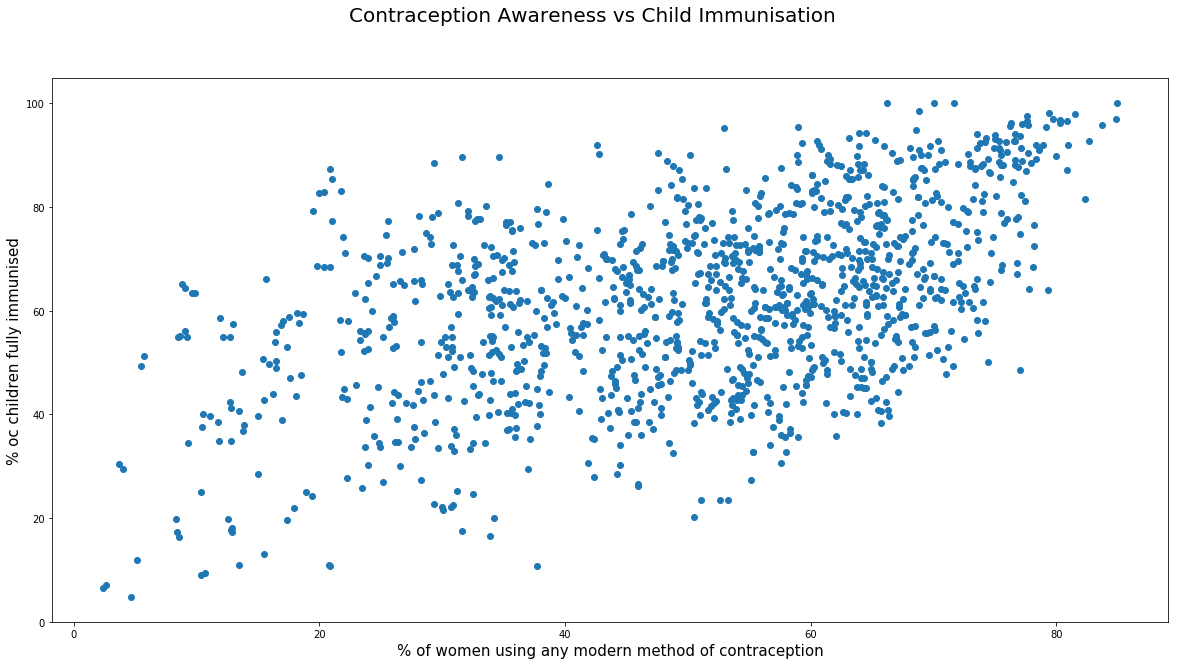

In [44]:
### ALL VALUES
plt.scatter(x=dataset['18. Any method (%)'],y=dataset['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'], )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=15)
plt.ylabel('% oc children fully immunised', fontsize=15)


In [46]:
dataset['18. Any method (%)'].corr(dataset['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'])

0.506906417985243

Text(0, 0.5, '% oc children fully immunised')

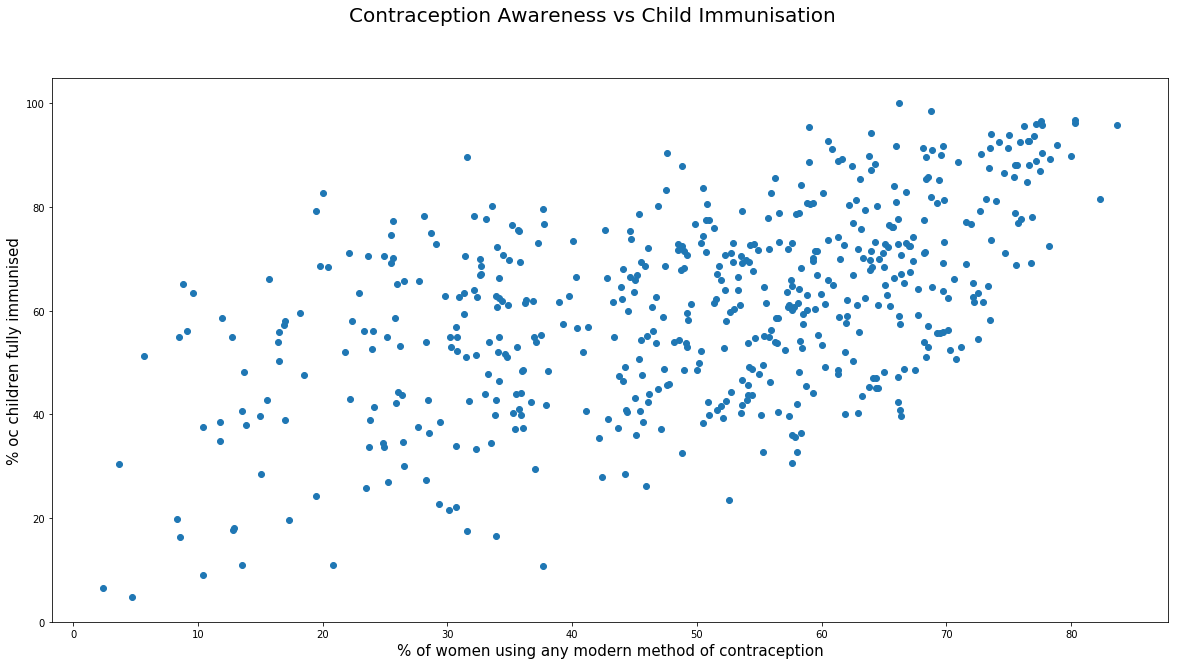

In [98]:
### ONLY RURAL
dataset_rural=dataset[dataset['Region']=='Rural']
dataset_urban=dataset[dataset['Region']=='Urban']
dataset_total=dataset[dataset['Region']=='Total']
plt.scatter(x=dataset_rural['18. Any method (%)'],y=dataset_rural['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'], )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=15)
plt.ylabel('% oc children fully immunised', fontsize=15)


In [91]:
dataset_rural['18. Any method (%)'].corr(dataset_rural['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'])

0.5302938559693279

Text(0, 0.5, '% oc children fully immunised')

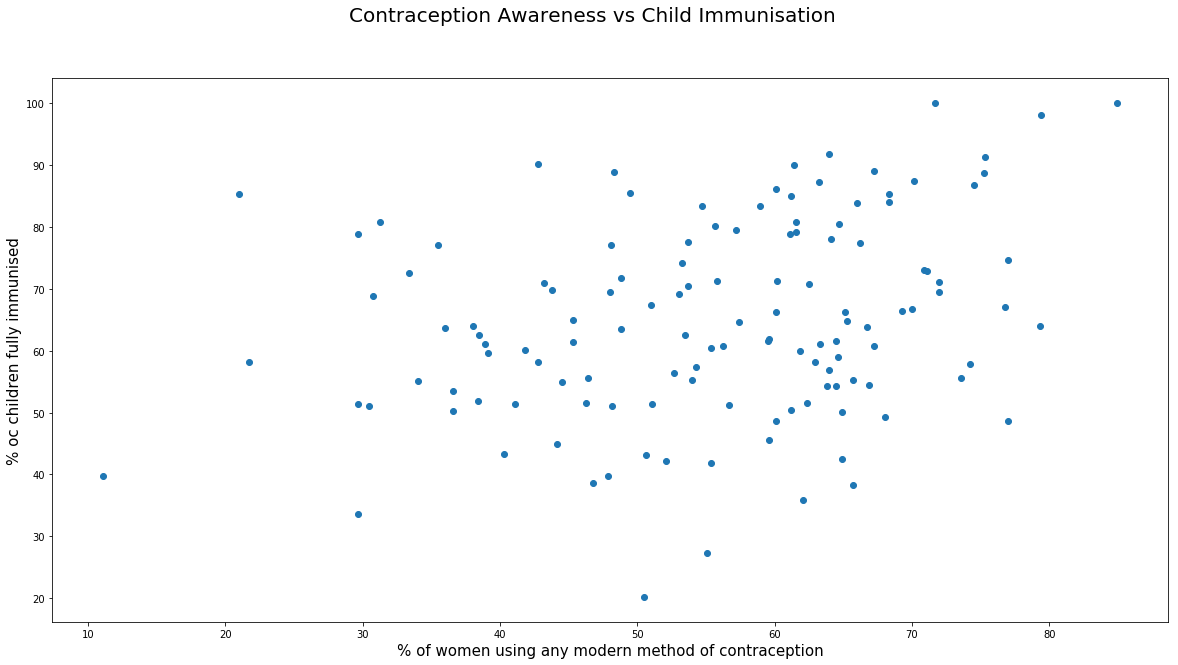

In [99]:
###URBAN ONLY
plt.scatter(x=dataset_urban['18. Any method (%)'],y=dataset_urban['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'], )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=15)
plt.ylabel('% oc children fully immunised', fontsize=15)


In [101]:
dataset_urban['18. Any method (%)'].corr(dataset_urban['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'])
#####no significant difference for urban households

0.2848411782025528

Text(0, 0.5, '% of children who have received BCG ')

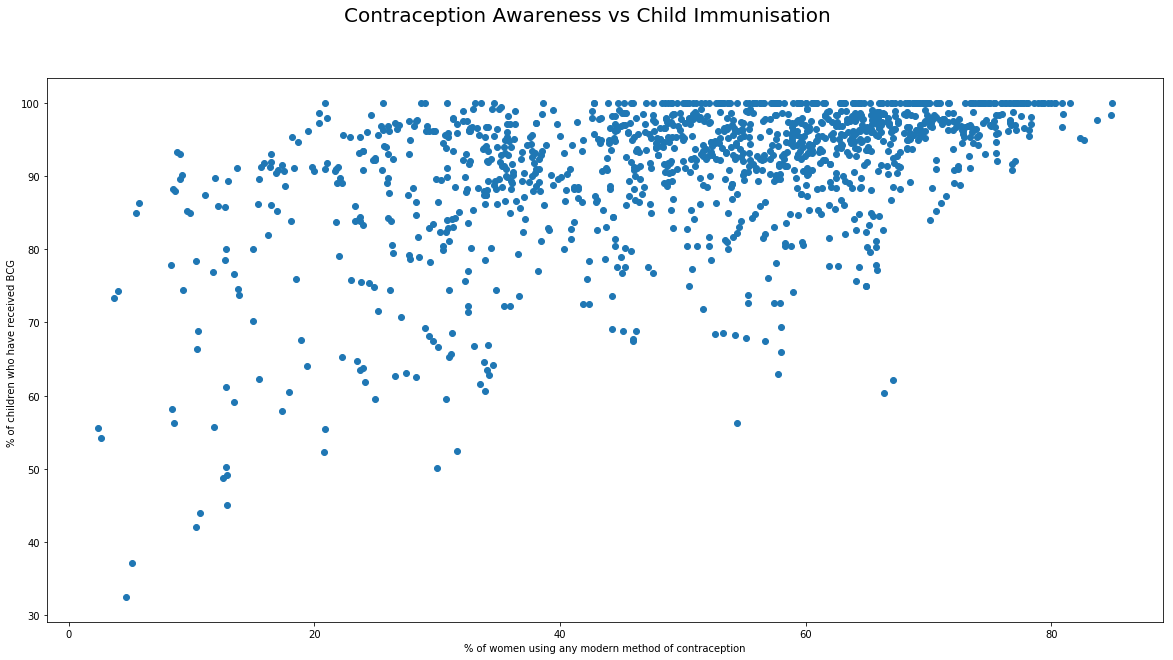

In [48]:
### ALLVALUES
plt.scatter(x=dataset['18. Any method (%)'],y=dataset['48. Children age 12-23 months who have received BCG (%)'] )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=10)
plt.ylabel('% of children who have received BCG ', fontsize=10)


In [94]:
dataset['18. Any method (%)'].corr(dataset['48. Children age 12-23 months who have received BCG (%)'] )

0.4881637230447615

Text(0, 0.5, '% of children who have received BCG ')

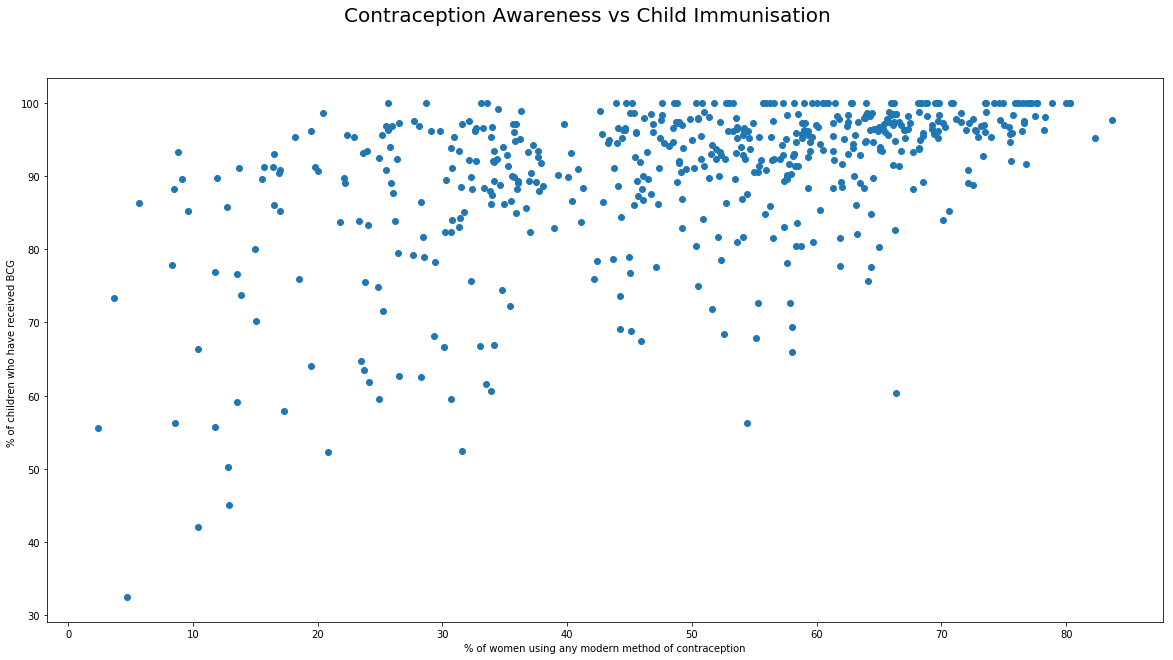

In [96]:
### RURAL ONLY
plt.scatter(x=dataset_rural['18. Any method (%)'],y=dataset_rural['48. Children age 12-23 months who have received BCG (%)'] )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=10)
plt.ylabel('% of children who have received BCG ', fontsize=10)


In [102]:
dataset_rural['18. Any method (%)'].corr(dataset_rural['48. Children age 12-23 months who have received BCG (%)'] )

0.4951187817368155

Text(0, 0.5, '% of children who have received BCG ')

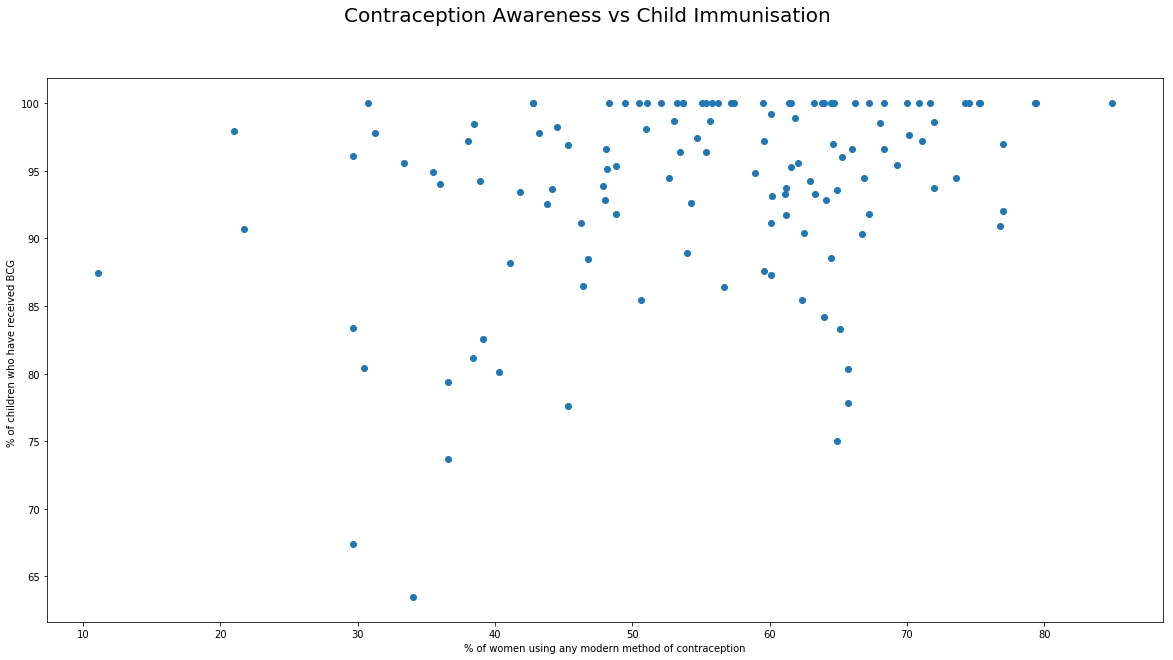

In [104]:
### RURAL ONLY
plt.scatter(x=dataset_urban['18. Any method (%)'],y=dataset_urban['48. Children age 12-23 months who have received BCG (%)'] )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=10)
plt.ylabel('% of children who have received BCG ', fontsize=10)


In [106]:
dataset_urban['18. Any method (%)'].corr(dataset_urban['48. Children age 12-23 months who have received BCG (%)'] )

0.32630726017710815

Text(0, 0.5, '% of children who have received BCG ')

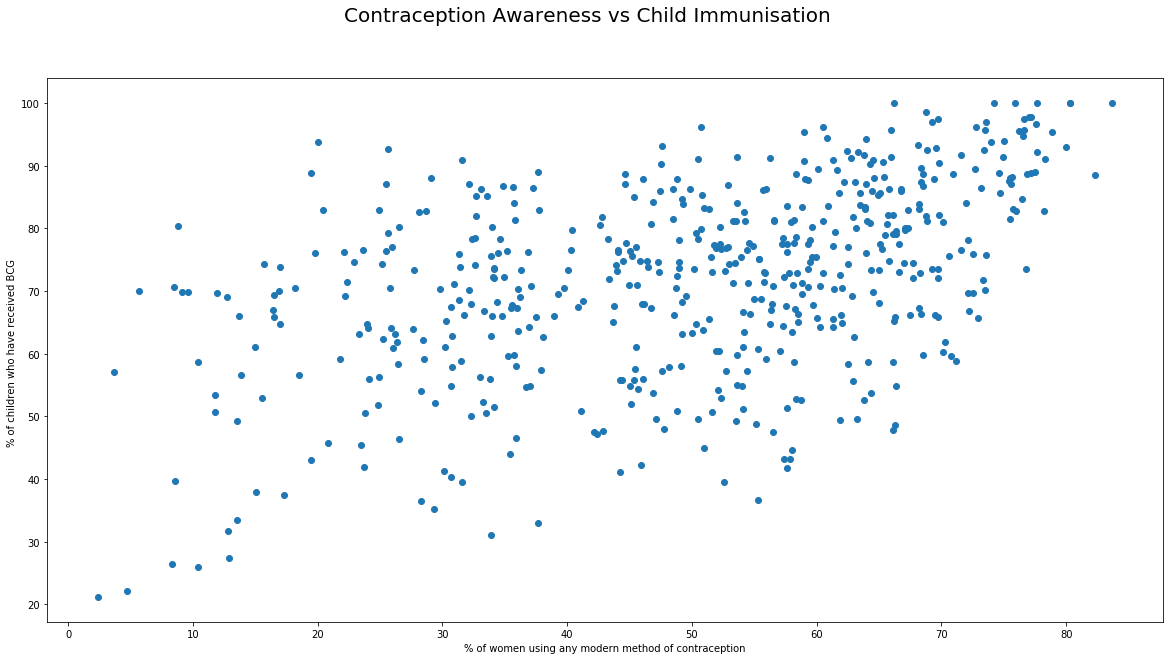

In [108]:
### RURAL ONLY
plt.scatter(x=dataset_rural['18. Any method (%)'],y=dataset_rural['49. Children age 12-23 months who have received 3 doses of polio vaccine (%)'] )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=10)
plt.ylabel('% of children who have received BCG ', fontsize=10)


In [110]:
dataset_rural['18. Any method (%)'].corr(dataset_rural['49. Children age 12-23 months who have received 3 doses of polio vaccine (%)'] )

0.4804806440554921

In [ ]:
### URBAN ONLY
plt.scatter(x=dataset_rural['18. Any method (%)'],y=dataset_rural['49. Children age 12-23 months who have received 3 doses of polio vaccine (%)'] )
plt.suptitle('Contraception Awareness vs Child Immunisation', fontsize=20)
plt.xlabel('% of women using any modern method of contraception', fontsize=10)
plt.ylabel('% of children who have received BCG ', fontsize=10)
